In [1]:
import os, librosa, librosa.display
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import sys

from IPython.display import Audio

sys.path.append('..')
audio_root_folder = '../archive/data'

In [2]:
labels_csv = os.path.join(audio_root_folder, 'features_30_sec.csv')
df = pd.read_csv(labels_csv, header=0)
df.head(5)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [3]:
num_audios = len(df['filename'])
labels = df['label'].unique()
num_labels = len(labels)

num_audios, num_labels, labels

(1000,
 10,
 array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
        'metal', 'pop', 'reggae', 'rock'], dtype=object))

Display one random audio

In [4]:
rand_row = np.random.choice(num_audios, 1)
rand_entry = df.iloc[rand_row]
rand_entry

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
239,country.00039.wav,661794,0.437655,0.075104,0.096378,0.000761,3760.290664,586377.891488,3052.840652,127629.360052,...,45.770962,-4.375562,42.098026,-2.596269,64.526718,-3.530173,59.683125,-4.229811,69.625702,country


In [5]:
example_label, example_filename = rand_entry['label'].to_numpy()[0], rand_entry['filename'].to_numpy()[0]
example_audio_path = os.path.join(audio_root_folder, 'genres_original', example_label, example_filename)

example_audio, sample_rate = librosa.load(example_audio_path)
Audio(example_audio, rate=sample_rate)

Plot features of an audio

In [6]:
import matplotlib.pyplot as plt
from audio_toolbox.visualize import AudioVisualizer

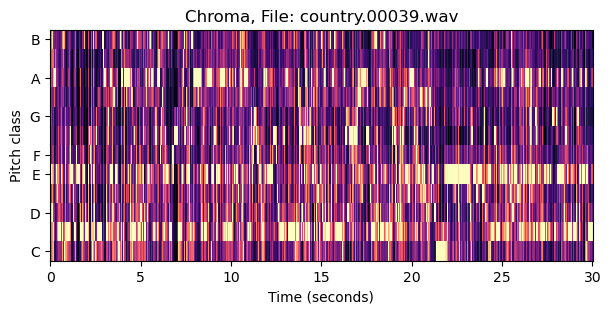

In [20]:
chroma = AudioVisualizer('chroma_stft')
fig = chroma.visualize(audio=example_audio, filename=example_filename, n_chroma=12)
plt.show();

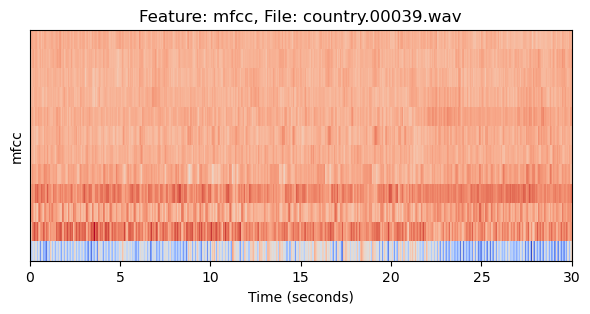

In [21]:
mfcc = AudioVisualizer('mfcc')
fig = mfcc.visualize(audio=example_audio, filename=example_filename, n_mfcc=12)
plt.show();

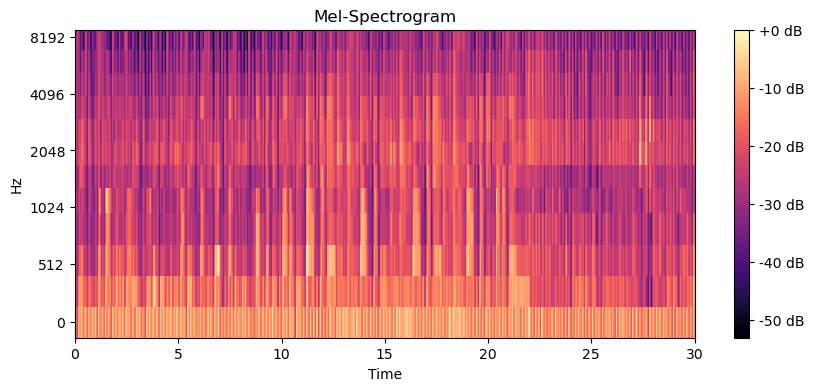

In [33]:
from librosa import feature

mel_spectrogram = librosa.feature.melspectrogram(y=example_audio, n_mels=12)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Display the Mel-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sample_rate, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.show()

In [30]:
tempogram = feature.tempogram(y=example_audio, win_length=12)
tempogram.shape

(12, 1293)

In [ ]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift

# Define a pipeline of augmentation transformations
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.2, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
])

# Apply augmentation to an audio sample
augmented_audio = augment(samples=example_audio, sample_rate=sample_rate)


In [ ]:
augmented_audio.shape

(661794,)

In [ ]:
example_audio.shape

(661794,)